# Trig Points
https://www.ordnancesurvey.co.uk/gps/legacy-control-information/triangulation-stations<br>
https://osdatahub.os.uk/

In [10]:
# import libraries and set variables

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

trig=r"C:\dataGIS\OS\CompleteTrigArchive.csv"

s_day='Brian Price #30DayMapChallenge 2021 Day 1 Points'
s_title="Great Britain's 7,111 triangulation pillars  (coloured by height)"

s_code='Created using Python/Jupyter Notebook at www.github.com/bpmapper/bp21map30'
s_data='Data from www.ordnancesurvey.co.uk/gps/legacy-control-information/triangulation-stations'
s_copy='Contains OS data © Crown copyright and database right 2021'

In [2]:
# read in downloaded trig file

df=pd.read_csv(trig)
df.columns=[col.lower().replace(' ','_') for col in df.columns]
df.sample(3)

,trig_name,station_name,new_name,easting,northing,height,order,type_of_mark,secondary_computing_block,computing_date,maintained,class_of_levelling,date_of_levelling,levelling_datum,destroyed_mark_indicator,comments
4440,Burnhead Bridge,NS77/T325,NS77T325,295312.94,661452.65,0.0,4,BLOCK,NS77,01/06/1952,01/10/1958,0,NaN,NaN,1,Destroyed 11/93
31389,Xylonite Works Chy,TM23/INT37,TM23I037,610697.41,232757.61,0.0,4,CHIMNEY,TM23,01/06/1952,01/10/1980,0,NaN,NaN,0,NaN
8539,Dolphinholme Ch Twr,SD47/T66,SD47T066,351711.20,453348.05,0.0,4,CENTRE,SD47,01/06/1951,NaN,0,NaN,NaN,0,NaN


In [3]:
# see types of trig point

df.type_of_mark.value_counts()[:10]

PILLAR        7111
BOLT          6032
BLOCK         3289
BURIED BLK    2874
SPIRE         2555
FLAGSTAFF     2353
CENTRE        1756
RIVET         1404
VANE           961
CHIMNEY        751
Name: type_of_mark, dtype: int64

In [4]:
# turn df into a geodataframe

gdf=gpd.GeoDataFrame(df,
                     geometry=gpd.points_from_xy(df.easting, df.northing),
                     crs="epsg:27700")

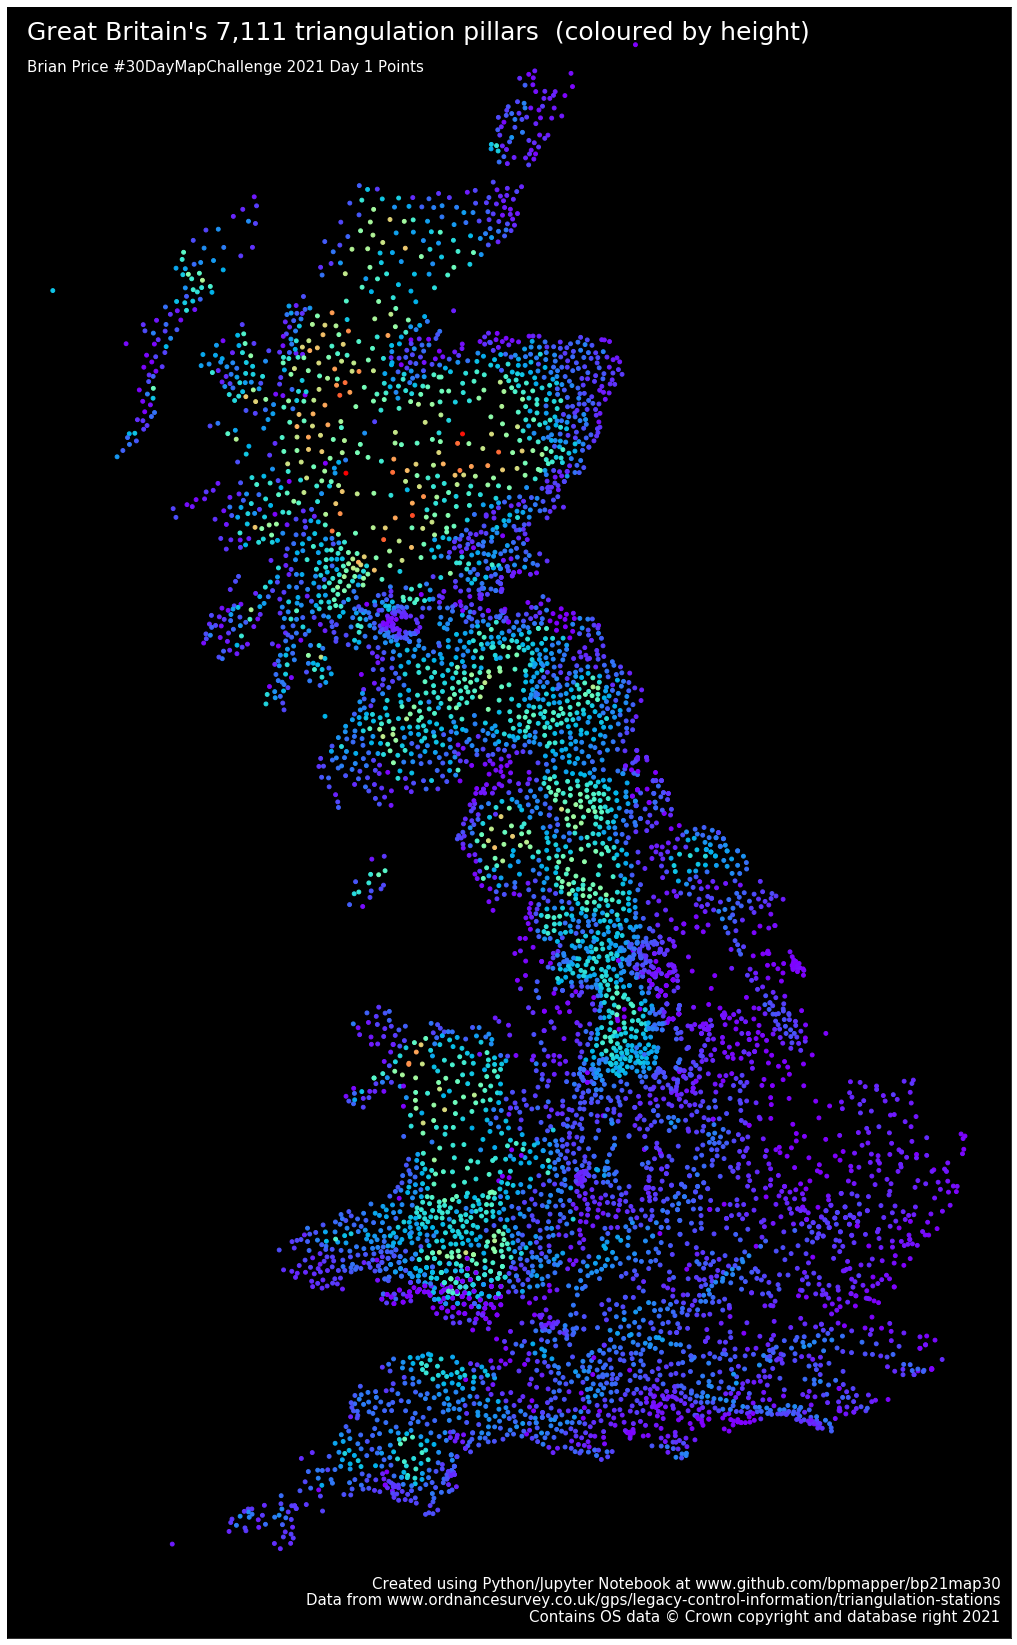

In [11]:
# Plot pillars by height

fig, ax = plt.subplots(figsize=(25,30))
gdf[gdf.type_of_mark=='PILLAR'].plot(ax=ax, column='height',cmap='rainbow', markersize=15)

ax.set_facecolor('black')

ax.text(.02,.96,s_day,transform=ax.transAxes, fontsize=15).set_color('white')
ax.text(.02,.98,s_title,transform=ax.transAxes, fontsize=25).set_color('white')       
ax.text(.99,.03,s_code,transform=ax.transAxes, fontsize=15, horizontalalignment='right').set_color('white')       
ax.text(.99,.02,s_data,transform=ax.transAxes, fontsize=15, horizontalalignment='right').set_color('white')       
ax.text(.99,.01, s_copy,transform=ax.transAxes, fontsize=15, horizontalalignment='right').set_color('white')

ax.set_ylim([-50000, 1100000])
plt.tick_params(axis='both',which='both',bottom=False,left=False,labelbottom=False,labelleft=False)

plt.show()

fig.savefig('Day01_Points_GBTrigPillars.png')

In [6]:
# view location of selected mark types
# convert geodataframe to WGS and plot in folium

gdfWGS=gdf.to_crs('epsg:4326')
mymap=folium.Map(location=[52.5,-1.85], zoom_start=7, control_scale=True)

for fg in ['CUPOLA','LIGHTHOUSE','CHIMNEY']:
    fgroup=folium.FeatureGroup(fg)
    for row in gdfWGS[gdfWGS.type_of_mark==fg].itertuples():
        folium.CircleMarker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        radius=5,
        tooltip=row.trig_name
        ).add_to(fgroup)
    fgroup.add_to(mymap)
folium.LayerControl().add_to(mymap)
mymap
    
    